**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Student.csv')
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8837,8,70,No,5,2,63.0
7199,7,76,Yes,6,8,67.0
7561,7,71,No,8,2,62.0
2504,4,48,No,4,7,34.0
4240,8,91,No,6,9,89.0


In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.rename(columns={'Sample Question Papers Practiced':'Sample_Papers'},inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours Studied               10000 non-null  int64  
 1   Previous Scores             10000 non-null  int64  
 2   Extracurricular Activities  10000 non-null  object 
 3   Sleep Hours                 10000 non-null  int64  
 4   Sample_Papers               10000 non-null  int64  
 5   Performance Index           10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample_Papers,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.isnull().sum()

Hours Studied                 0
Previous Scores               0
Extracurricular Activities    0
Sleep Hours                   0
Sample_Papers                 0
Performance Index             0
dtype: int64

In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample_Papers', 'Performance Index'],
      dtype='object')

In [9]:
correlation = df[['Hours Studied' , 'Previous Scores' , 'Sleep Hours' , 'Sample_Papers']]
correlation = correlation.corr()

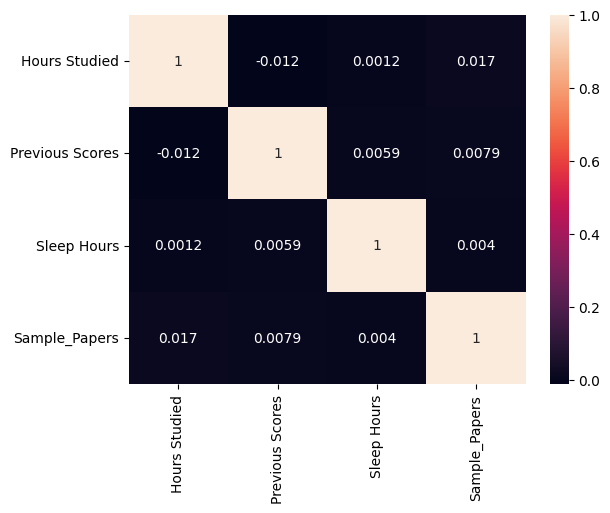

In [10]:
sns.heatmap(correlation,annot=True)
plt.show()

In [11]:
#Pairplot To Visualize Relationships
#sns.pairplot(df,x_vars=correlation,y_vars=df['Performance Index'],height=5,aspect=0.7)
#plt.show()

**Importing Scikit-learn Package**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Defining Input & Target Data**

In [13]:
X = df[['Hours Studied' , 'Previous Scores' , 'Sleep Hours' , 'Sample_Papers']]
Y = df['Performance Index']

**Splitting Data**

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [15]:
model = LinearRegression()


In [16]:
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample_Papers
6252,5,69,8,2
4684,2,46,4,8
1731,7,56,7,5
4742,6,42,8,5
4521,7,53,4,6
...,...,...,...,...
6412,2,70,7,3
8285,4,79,9,3
7853,2,40,7,2
1095,3,83,7,5


In [18]:
Y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

**Importing Evaluation-Metrics**

**MSE(Mean-Squared-Error)**

**R-Square(R^2)**

In [19]:
from sklearn.metrics import mean_squared_error , r2_score

#Prediction On Test Data
prediction = model.predict(X_test)


In [20]:
#Calculate MSE and R2
mse = mean_squared_error(Y_test,prediction)
r2 = r2_score(Y_test,prediction)

print(f"Mean Squared Error : {mse}\nR2 Score :{r2}")

Mean Squared Error : 4.182254914593815
R2 Score :0.9887144552384186


In [21]:
prediction

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491])

In [22]:
model.score(X_train,Y_train)

0.9884388348325367

In [23]:
model.score(X_test,Y_test)

0.9887144552384186

In [24]:
# Real Values vs Predicted Values

data=pd.DataFrame({"Actual Performance" : Y_test, "Predicted Performance" : prediction})
new_df = data
new_df

,Actual Performance,Predicted Performance
6252,51.0,55.007864
4684,20.0,22.314446
1731,46.0,47.594047
4742,28.0,30.975972
4521,41.0,43.314711
...,...,...
6412,45.0,47.184627
8285,66.0,62.990372
7853,16.0,16.481829
1095,65.0,63.642437


In [25]:
fig = px.scatter(x=Y_test,y=prediction,width=500,height=600)
fig.show()